In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

### Exploring Categories

In [5]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


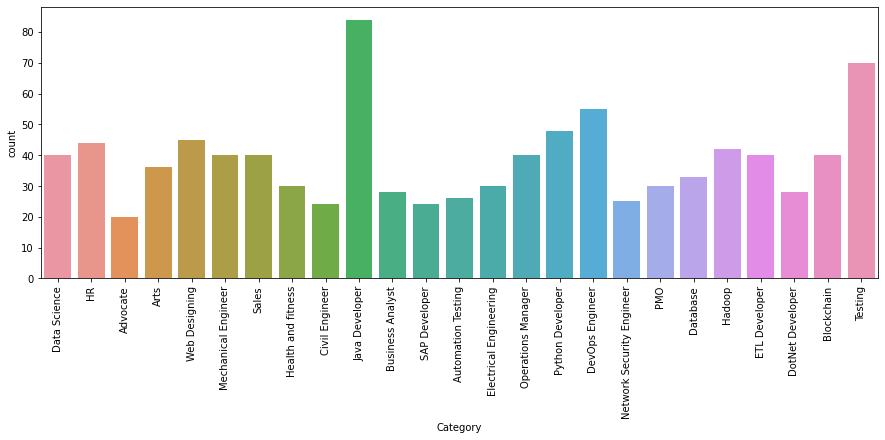

In [6]:
plt.figure(figsize = (15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [7]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [8]:
counts = df['Category'].value_counts()
label = df['Category'].unique()

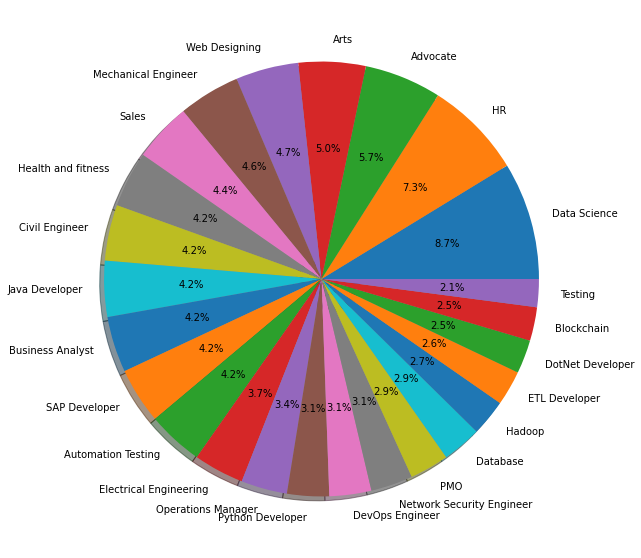

In [9]:
plt.figure(figsize = (15,10))
plt.pie(counts,labels = label, autopct='%1.1f%%', shadow=True)
plt.show()

### Exploring Resume

In [10]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [11]:
df['Category'][0]

'Data Science'

In [12]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

### Cleaning Data

1. URLs
2. hashtags
3. mentions
4. special letters
5. punctuations

In [13]:
import re

In [14]:
def cleanResume(txt):
    cleanTxt = re.sub('http\S+\s',' ', txt)
    cleanTxt = re.sub('RT|cc',' ', cleanTxt)
    cleanTxt = re.sub('#\S+\s',' ', cleanTxt)
    cleanTxt = re.sub('@\S+',' ', cleanTxt)
    cleanTxt = re.sub('[%s]'%re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanTxt)
    cleanTxt = re.sub(r'[^\x00-\x7f]',' ', cleanTxt)
    cleanTxt = re.sub('\s+',' ', cleanTxt)
    
    return cleanTxt

In [15]:
df['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [16]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [17]:
df['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [18]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

### Words into categorical Values

In [19]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [22]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [23]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

### Vectorization

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredtext = tfidf.transform(df['Resume'])

In [25]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [26]:
requiredtext

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

### Splitting

In [27]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split( requiredtext, df['Category'], test_size=0.2, random_state=42)

In [31]:
X_train.shape

(769, 7351)

In [32]:
X_test.shape

(193, 7351)

### Train the model and print the classification report

In [33]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [34]:
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [35]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9844559585492227


### Prediction System

In [36]:
myresume = """PROFESSIONAL SUMMARY
An aspiring Data Scientist with a Post-Graduation in Data Analytics from Imarticus Learning. A Masters in Science specialized with Mathematics in 2014 and graduated in the year 2012. Having 7+ years of experience in HR and Teaching field. Interested in pursuing a career in Data science and business analytics with the ability to identify the fine points of data. Well versed in data exploration, data mining, statistical analysis and data visualization techniques. Additionally, skilled in leadership, public speaking, problem-solving, and decision making. Looking forward to utilizing these skills in your esteemed organization.
EXPERIENCE
05/2017 to 02/2022	HR –Admin Executive
Ingersoll Rand India Limited – Ahmedabad, Gujarat
•	Managing and coordinating HR and administrative tasks.
•	Arranging Interviews and on boarding process.
•	Managing employee records and benefits, and overseeing compliance with labor laws and regulations.
05/2016 to 04/2017	Mathematics Teacher
Divine Life International English Medium School – Ahmedabad, Gujarat
•	Plan, prepare and deliver engaging and effective lessons.
•	Assessing and Evaluating Students progress.
•	Guidance and support to students in Maths related activities.
05/2014 to 04/2016	Mathematics Lecturer
Bhavan’s R A college of science – Ahmedabad, Gujarat
•	Teach and instruct undergraduate students.
•	Create and deliver lectures, lead discussions, and provide feedback on assignments and exams.

SKILLS
•	Statistical Analysis	•	Problem Solving & Decision Making
•	Machine Learning 	•	Adaptability
•	Natural Language Processing Text Analytics 	•	Leadership
•	Programming Languages (Python, SQL, MySQL)	•	Public Speaking & Story telling
•	Data Reporting tool (Matplotlib, Seaborn, Tableau, Power BI)	•	Creativity
•	Microsoft (General Office, Excel and Presentation)	•	Written Communication

EDUCATION
2023	Post-Graduation in Data Analytics and Machine Learning
Imarticus Learning - Mumbai
2018	Bachelors of Education – Mathematics (85.8%)
Hashmukh Goswami College – Ahmedabad, Gujarat
2014	Masters of Science - Mathematics (54.8%)
School of Science, Gujarat University – Ahmedabad, Gujarat
2012	Bachelors of Science - Mathematics (68.19%)
Bhavan’s R A College of Science, Gujarat University – Ahmedabad, Gujarat
PROJECTS
Project Title:	“A study on Face Emotion Detection”
Project Outcomes:	The project can detect the four Emotions (happy, sad, neutral, angry) of the person 
The Project uses YOLOv5 to detect the face emotion
The Project has well Precision, Recall scores to detect face emotion

Project Title:	“A study on Grammar Correction Web App”
Project Outcomes:	The project can correct grammatical error in text given by user/client 
The project uses Transformer model 
The project uses the BLEU score for evaluating the generated text by model.

Project Title:	“A study on Data Analysis on Hotel Booking”
Project Outcomes:	The high cancellation rates have negatively impacted revenue generation and hotel room utilization 
Lowering cancellation rates is a shared goal for both hotels to optimize revenue generation and maximum operational efficiency, necessitating data analysis to identify the underlying factor and offered effective business advice

ADDITIONAL QUALIFICATIONS / CERTIFICATIONS:
•	Introduction to Web Development with HTML, CSS, JavaScript (2023)
•	Data Science Virtual Experience Programme (2023)
•	Machine Learning Specialization. (2023)
•	Python for Data Science, AI and Development. (2023)
•	SQL for Data Science. (2023)
•	HR Analytics (2023)
ACHIEVEMENTS/AWARDS:
•	Won 3rd Prize in A R Rao Mathematical Competition in 2009 
•	Won Madhava Mathematics Competition in 2011. 
•	Awarded with the Best Teacher of the year in Divine Life International English Medium School in the year 2016-17.
•	Won Creative and Innovative Award in Ingersoll Rand in 2020.
"""


In [38]:
import pickle
#pickle.dump(requiredText, open('requiretext.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [42]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
predicted_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "Devops Engineer",
    20: "Python Developer",
    6: "Data Science",
    12: "HR",
    0: "Advocate",
    1: "Arts",
    24: "Web Designing",
    16: "Mechanical Engineer",
    22:"Sales",
    14:"Health and fitness",
    5: "Civil Engineer",
    4: "Business Analyst",
    21: "SAP Developer",
    2: "Automation Testing",
    11: "Electrical Engineering",
    18: "Operations Manager",
    17: "Network Security Engineer",
    19: "PMO",
    7: "Database",
    13: "Hadoop",
    10: "ETL Developer",
    9: "DotNet Developer",
    3: "Blockchain"
}

category_name = category_mapping.get(predicted_id, "unknown")

print("Predicted Category:", category_name)
print(predicted_id)

Predicted Category: Data Science
6
